# Tópicos complementares sobre o *numpy*

Nesta aula, faremos uma explanação sobre os seguintes tópicos complementares:

- Funções universais (*ufuncs*)
- *Currying*
- Agregações
- Ordenação 
- Entrada e saída de arquivos

## Funções universais 

Funções universais (*universal functions*, ou *ufuncs*) é o nome dado a qualquer função que pode operar sobre todos os elementos de um *array* nos moldes da computação vetorizada. Já aprendemos várias *ufuncs* do *numpy* como `sqrt`, `cos`, `exp` e `random.rand`.

Temos diversos tipos de *ufuncs*, porém, vamos dar exemplos de *ufuncs* unárias e binárias. 

- *ufunc* unária: é aquela que usa um único array como argumento. Por exemplo, quando fazemos algo como `y = np.sqrt(x)`, `x` é o único *array* usado de modo que $\sqrt{x}$ para cada elemento de `x` seja o resultado em `y`.

- *ufunc* binária: é aquela que usa dois *arrays* para produzir um resultado.

*Ufuncs* também podem produzir mais de um array como resultado, mas você aprenderá mais sobre isto durante a graduação. Aqui vamos mostrar apenas um exemplo: `modf`, uma função unária que é capaz de separar as partes inteira e fracionária de um array contendo números de ponto flutuante (`float`).

### Exemplos de *ufuncs* unárias

### `abs`, `fabs`

Calcula a função valor absoluto (módulo)

In [30]:
import numpy as np
import matplotlib.pyplot as plt # auxiliar 

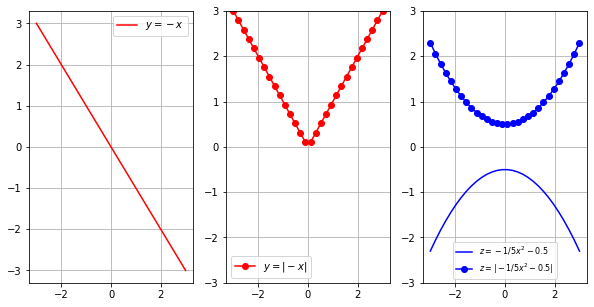

In [32]:
x = np.linspace(-3,3,30) # domínio

# y = f(x) = -x 
y = -x; 
ya = np.abs(y) # <===

# 
z = -1/5*x**2 - 0.5 # 
za = np.fabs(z) # <====

plt.figure(figsize=(10,5))

plt.subplot(131)
plt.plot(x,y,'r',label='$y=-x$'); plt.grid(); plt.legend()

plt.subplot(132)
plt.plot(x,ya,'o-r',label='$y=|-x|$'); plt.ylim(-3,3); plt.grid(); plt.legend()

plt.subplot(133)
plt.plot(x,z,'b',x,za,'-bo');\
         plt.ylim(-3,3); plt.grid();\
         plt.legend(['$z=-1/5x^2 - 0.5$','$z=| -1/5x^2 - 0.5 |$'],fontsize=8,loc='lower center');

#### `floor`, `round` e `ceil`

- `floor` aproxima números usando a função "piso" (maior inteiro menor ou igual ao número).
- `round` aproxima números usando a função "arredondamento" (inteiro mais próximo do número).
- `ceil` aproxima números usando a função "teto" (menor inteiro maior ou igual ao número).

x | floor(x) | round(x) | ceil(x)
1.06 | 1.0 | 1.0 | 2.0
1.12 | 1.0 | 1.0 | 2.0
2.50 | 2.0 | 2.0 | 3.0
2.81 | 2.0 | 3.0 | 3.0
3.96 | 3.0 | 4.0 | 4.0
5.49 | 5.0 | 5.0 | 6.0
5.53 | 5.0 | 6.0 | 6.0
6.51 | 6.0 | 7.0 | 7.0
6.53 | 6.0 | 7.0 | 7.0
7.00 | 7.0 | 7.0 | 8.0


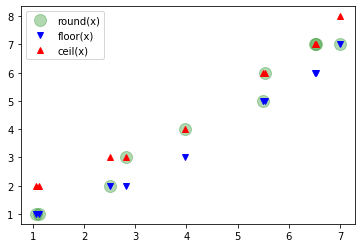

In [72]:
x = np.sort(np.random.rand(10)*8) # <====

f = np.floor(x)
r = np.round(x)
c = np.ceil(x) 

plt.plot(x,r,'og',alpha=0.3,ms=12,label='round(x)');
plt.plot(x,f,'vb',label='floor(x)');
plt.plot(x,c,'^r',label='ceil(x)');

print('x | floor(x) | round(x) | ceil(x)')
for i in range(len(x)):    
    print('{0:.2f} | {1:.1f} | {2:.1f} | {3:.1f}'.format(x[i],f[i],r[i],c[i]))
plt.legend();

#### `sign`

Retorna o "sinal" do número: 

- -1, se negativo
- 0, se zero
- 1, se positivo

Isto é: 

$$
f(x) =
\begin{cases}
-1,& \text{se }x < 0 \\
0,& \text{se }x = 0  \\
1,& \text{se }x > 0
\end{cases}
$$

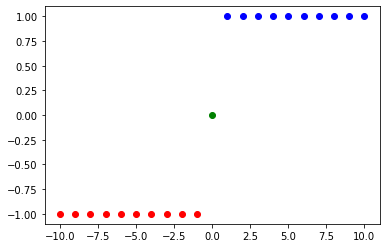

In [82]:
x = np.linspace(-10,10,21)
s = np.sign(x)
plt.plot( x[ x < 0 ], s[ x < 0 ],'ro');
plt.plot( x[ x == 0 ], s[ x == 0 ],'go');
plt.plot( x[ x > 0 ], s[ x > 0],'bo');

#### `modf`

Separa parte inteira e fracionária de um número.

In [88]:
x = np.sort(np.random.rand(8)*10) # <=====

f, i = np.modf(x) # desempacota as partes fracionária e inteira em f, i 

print('x | i | f')
for v in range(len(x)):    
    print('{0:.8f} | {1:.0f} | {2:.8f}'.format(x[v],i[v],f[v]))

x | i | f
4.47398973 | 4 | 0.47398973
6.06714518 | 6 | 0.06714518
7.83845840 | 7 | 0.83845840
7.96196352 | 7 | 0.96196352
8.11105806 | 8 | 0.11105806
8.20139127 | 8 | 0.20139127
8.47295005 | 8 | 0.47295005
9.05913268 | 9 | 0.05913268


### Exemplos de *ufuncs* binárias

#### `multiply`

Multiplica os elementos do primeiro array pelos elementos do segundo array.

In [92]:
x = np.linspace(-10,10,21) # numeros
y = np.linspace(0,20,21) # numeros

xy = np.multiply(x,y)

for i in range(len(x)):
    print('{0:.0f}*{1:.0f} = {2:.0f}'.format(x[i], y[i], xy[i]))

-10*0 = -0
-9*1 = -9
-8*2 = -16
-7*3 = -21
-6*4 = -24
-5*5 = -25
-4*6 = -24
-3*7 = -21
-2*8 = -16
-1*9 = -9
0*10 = 0
1*11 = 11
2*12 = 24
3*13 = 39
4*14 = 56
5*15 = 75
6*16 = 96
7*17 = 119
8*18 = 144
9*19 = 171
10*20 = 200


#### `power`

Eleva os elementos no primeiro array à potência especificada pelos elementos do segundo array.

In [7]:
x = np.linspace(-10,10,21) # numeros
exps = np.linspace(0,20,21) # expoentes
xe = np.power(x,exps)
for i in range(len(x)):
    print('{0:.0f}**{1:.0f} = {2:.0f}'.format(x[i], exps[i], xe[i]))

-10**0 = 1
-9**1 = -9
-8**2 = 64
-7**3 = -343
-6**4 = 1296
-5**5 = -3125
-4**6 = 4096
-3**7 = -2187
-2**8 = 256
-1**9 = -1
0**10 = 0
1**11 = 1
2**12 = 4096
3**13 = 1594323
4**14 = 268435456
5**15 = 30517578125
6**16 = 2821109907456
7**17 = 232630513987207
8**18 = 18014398509481984
9**19 = 1350851717672992000
10**20 = 100000000000000000000


## *Currying*

*Currying* é o processo de derivar novas funções a partir de funções existentes pela *aplicação parcial de argumentos*.

Por exemplo:

- Defina uma UDF;

In [94]:
def pot_a(x,y,a):
    return np.power(x,y) + a # eleva x a y e soma a 

- Use a UDF em uma segunda função de modo que um de seus argumentos seja fornecido por esta segunda função;

In [97]:
x = np.array([1,2,3])
y = np.array([3,4,5])

segunda_funcao = lambda k: pot_a(x,y,k) # currying em a 
segunda_funcao(3)

array([  4,  19, 246])

Acima, dizemos que o argumento `a` de `pot_a` sofreu *currying* porque foi substituído pelo valor `k`, fornecido pela `lambda` `segunda_funcao`.

## Agregações

Agregações (ou reduções) são funções de bastante utilidade em matemática e estatística para calcular somas, médias e outras grandezas ao longo do eixo de um *array*. Daremos dois exemplos: `sum` (soma) e `mean` (média).

#### `sum`

Suponha que tenhamos uma matriz como a seguinte:

In [103]:
A = np.random.randint(0,100,(3,3))
A

array([[93, 75,  8],
       [92, 78, 11],
       [18, 13, 30]])

- Para calcular a soma de todos os seus elementos, podemos usar a função `np.sum` ou o método `.sum`:

In [104]:
np.sum(A) # como função 

418

In [105]:
A.sum() # como método

418

- Para calcular a soma dos elementos ao longo das colunas (somar cada linha), podemos fazer:

In [107]:
np.sum(A, axis = 1) # soma por linhas

array([176, 181,  61])

Ou seja, isto é equivalente a: 

In [108]:
np.array( [ sum(A[0,:]), sum(A[1,:]), sum(A[2,:]) ] )

array([176, 181,  61])

- Para calcular a soma dos elementos ao longo das linhas (somar cada coluna), podemos fazer:

In [110]:
np.sum(A,axis = 0) # soma por colunas

array([203, 166,  49])

Ou seja, isto é equivalente a:

In [112]:
np.array( [ sum(A[:,0]), sum(A[:,1]), sum(A[:,2]) ] )

array([203, 166,  49])

#### `mean`

O cálculo da média aritmética pode ser realizado da mesma forma.

In [114]:
np.mean(A), A.mean(), np.mean(A) == A.mean()

(46.44444444444444, 46.44444444444444, True)

In [115]:
np.mean(A,axis=1) # média por linhas

array([58.66666667, 60.33333333, 20.33333333])

In [116]:
 np.mean(A,axis=0) # média por colunas

array([67.66666667, 55.33333333, 16.33333333])

## Ordenação

Na plotagem das funções "piso", "teto" e "arredondamento", usamos ordenação. Para ordenar elementos de um array, use `sort`.

In [120]:
desordenado = np.random.randint(-30,100,10)
ordenado = np.sort(desordenado)
ordenado

array([-24, -12,   1,   9,  23,  75,  86,  90,  94,  98])

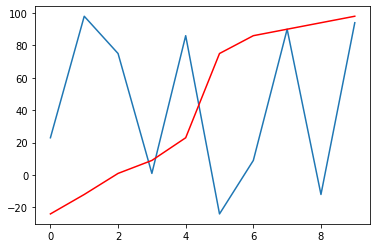

In [121]:
plt.plot(desordenado);
plt.plot(ordenado,'r');

## Entrada e saída de arquivos 

Podemos ler o conteúdo de um arquivo através do Numpy, bem como escrever e salvar um arquivo novo quando o propósito é trabalhar com matrizes de dados. Mostraremos duas maneira de trabalhar com arquivos: 

- manipulando arquivos de dados simples com extensão `.txt`.
- manipulando arquivos especiais do numpy com extensão `.npy`.

Os arquivos `.npy` são do tipo binário e puros do numpy. Eles possuem propriedades de eficiência e servem para armazenarem informações pertinentes ao numpy. Ou seja, o numpy tem seu próprio tipo de arquivo. 

**Exemplo:** O arquivo `05a-consumo.txt` (disponibilizado junto com o material) contém uma matriz de dados contendo a massa em quilogramas (2a. coluna) e o consumo medido em quilômetros por litro (3a. coluna) de alguns modelos de automóveis. Você pode usar um editor de texto para visualizar o arquivo. Ele deve se parecer com


| modelo         | massa (kg) | C (km/litro) |
|:--------------:|:----------:|:------------:|
| Focus          | 1198       | 11.90        |
| Crown Victoria | 1715       | 6.80         |
| Expedition     | 2530       | 5.53         |
| Explorer       | 2014       | 6.38         |
| F-150          | 2136       | 5.53         |
| Fusion         | 1492       | 8.50         |
| Taurus         | 1652       | 7.65         |
| Fit            | 1168       | 13.60        |
| Accord         | 1492       | 9.78         |
| CR-V           | 1602       | 8.93         |
| Civic          | 1192       | 11.90        |
| Ridgeline      | 2045       | 6.38         |

Podemos ler o conteúdo deste arquivo e salvá-lo diretamente em uma matriz com a função `loadtxt('caminho_do_arquivo')`.

In [123]:
M = np.loadtxt('05a-consumo.txt')
M

ValueError: could not convert string to float: 'Focus'

- Por que o erro? 

Porque a primeira coluna contém strings. Para ignorá-las, selecionamos as colunas que queremos usar com `usecols`.

In [125]:
M = np.loadtxt('05a-consumo.txt',usecols=(1,2)) # usa 2a. e 3a. colunas 
M

array([[1198.  ,   11.9 ],
       [2530.  ,    5.53],
       [2014.  ,    6.38],
       [2136.  ,    5.53],
       [1492.  ,    8.5 ],
       [1652.  ,    7.65],
       [1168.  ,   13.6 ],
       [1492.  ,    9.78],
       [1602.  ,    8.93],
       [1192.  ,   11.9 ],
       [2045.  ,    6.38]])

Podemos operar livremente com este array. Digamos que queiramos calcular o consumo para uma viagem de 250 km com cada veículo. Fazemos simplesmente:

In [126]:
c200 = M[:,1]*250
c200

array([2975. , 1382.5, 1595. , 1382.5, 2125. , 1912.5, 3400. , 2445. ,
       2232.5, 2975. , 1595. ])

Agora, digamos que queiramos salvar um novo arquivo com esta coluna adicional. Primeiro, concatenamos este resultado na matriz.

In [25]:
M2 = np.concatenate((M,c200[:,np.newaxis]),axis=1) # concatena
M2

array([[1198.  ,   11.9 , 2975.  ],
       [2530.  ,    5.53, 1382.5 ],
       [2014.  ,    6.38, 1595.  ],
       [2136.  ,    5.53, 1382.5 ],
       [1492.  ,    8.5 , 2125.  ],
       [1652.  ,    7.65, 1912.5 ],
       [1168.  ,   13.6 , 3400.  ],
       [1492.  ,    9.78, 2445.  ],
       [1602.  ,    8.93, 2232.5 ],
       [1192.  ,   11.9 , 2975.  ],
       [2045.  ,    6.38, 1595.  ]])

Enfim, podemos usar a função `savetxt('caminho_do_arquivo',array)` para exportar o conteúdo de `array` para um arquivo. No caso a seguir, nosso novo arquivo tem o nome de `05a-consumo-tabela.txt`.

In [26]:
np.savetxt('05a-consumo-tabela.txt',M2) # salva o conteúdo de M2 em arquivo

Para verificar que ambos os arquivos estão salvos, faça:

In [129]:
%%script bash 
ls *.txt # lista os arquivos .txt nesta pasta.

05a-consumo-tabela.txt
05a-consumo.txt


#### `%%script`

O comando `%%script` permite que uma instrução em outra linguagem de programação (_shell script_) seja executada. No caso anterior, a instrução diz: "no diretório em que estou, liste para mim todos os arquivos com extensão *.txt*".

#### `%who` e `%whos`

O comando mágico `%who` (significando *Who is here?*, "Quem está aqui?") serve para listarmos todas as variáveis presentes no atual espaço de trabalho. Já `%whos` expande as informações acerca delas.

In [130]:
%who

A	 M	 M2	 a	 c	 c200	 desordenado	 exps	 f	 
i	 indices	 np	 ordenado	 plt	 pot_a	 r	 s	 segunda_funcao	 
v	 x	 xe	 xy	 y	 ya	 z	 za	 


In [131]:
%whos

Variable         Type        Data/Info
--------------------------------------
A                ndarray     3x3: 9 elems, type `int64`, 72 bytes
M                ndarray     11x2: 22 elems, type `float64`, 176 bytes
M2               ndarray     11x3: 33 elems, type `float64`, 264 bytes
a                int         2
c                ndarray     10: 10 elems, type `float64`, 80 bytes
c200             ndarray     11: 11 elems, type `float64`, 88 bytes
desordenado      ndarray     10: 10 elems, type `int64`, 80 bytes
exps             ndarray     21: 21 elems, type `float64`, 168 bytes
f                ndarray     8: 8 elems, type `float64`, 64 bytes
i                int         20
indices          ndarray     21: 21 elems, type `bool`, 21 bytes
np               module      <module 'numpy' from '/Us<...>kages/numpy/__init__.py'>
ordenado         ndarray     10: 10 elems, type `int64`, 80 bytes
plt              module      <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
pot_a        